### Assignment 2 : Introduction to Machine Learning (EE 769)
#### Author : Vedant Yadav (210110116)

#### Question 1

In [78]:
# Importing Necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
plt.style.use('ggplot')

In [2]:
# Importing functions from sklearn library
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [3]:
# Importing the dataset
df_red = pd.read_csv('winequality-red.csv', delimiter=';')
df_white = pd.read_csv('winequality-white.csv', delimiter=';')

#### Inspecting the data set

In [4]:
print(df_red.shape)
print(df_white.shape)

(1599, 12)
(4898, 12)


In [5]:
df_red.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [6]:
df_white.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [7]:
print(df_red.columns)
print(df_white.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [8]:
df_white.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [9]:
df_red.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [10]:
df_red.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

#### Data pre-processing

Checking for null values

In [11]:
df_red.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
df_white.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

As we can see, there are no null values in our data set.

In [13]:
df_red.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

In [14]:
df_white.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
4893    False
4894    False
4895    False
4896    False
4897    False
Length: 4898, dtype: bool

Since there are duplicated rows in our data set, we will remove them.

In [15]:
df_red = df_red.drop_duplicates().copy()
df_white = df_white.drop_duplicates().copy()

In [16]:
print(df_red.shape)
print(df_white.shape)

(1359, 12)
(3961, 12)


The duplicated rows are removed

#### Data Understanding and Visualization

In [17]:
# Examining number of unique values in each column
print("Unique values for each variable in White Wine data set")
for col in df_red.columns.values:
  list_val = pd.unique(df_red[col])
  print(col + ' has ' + str(len(list_val)) + ' unique values')

Unique values for each variable in White Wine data set
fixed acidity has 96 unique values
volatile acidity has 143 unique values
citric acid has 80 unique values
residual sugar has 91 unique values
chlorides has 153 unique values
free sulfur dioxide has 60 unique values
total sulfur dioxide has 144 unique values
density has 436 unique values
pH has 89 unique values
sulphates has 96 unique values
alcohol has 65 unique values
quality has 6 unique values


Observation : There are enough unique values for each variable in both the data sets. We will not drop any variable.

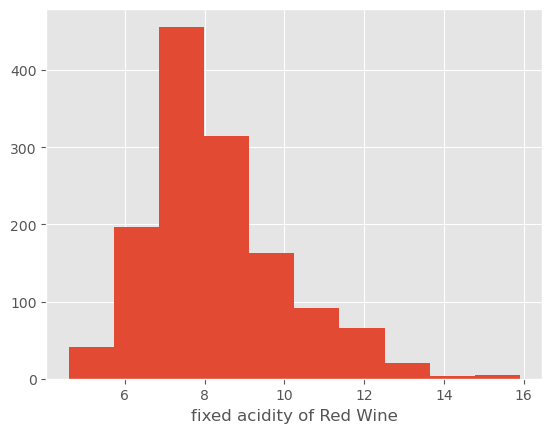

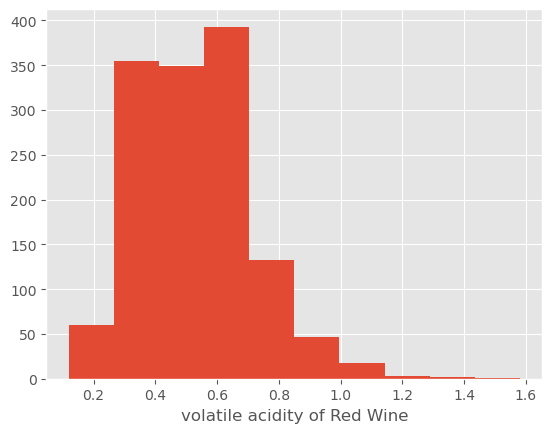

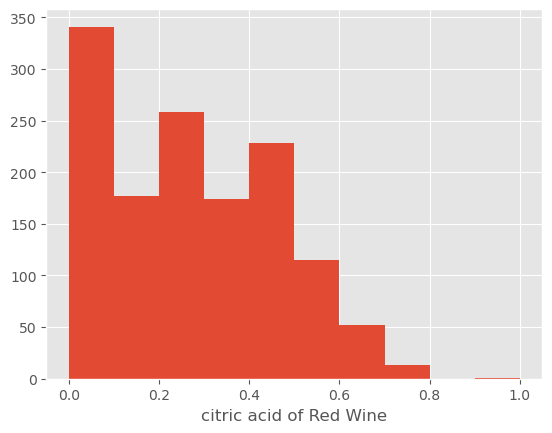

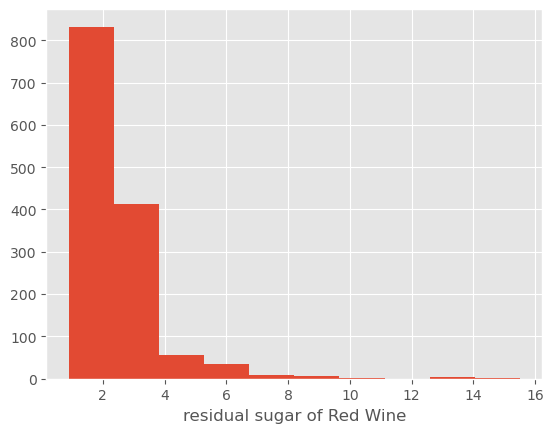

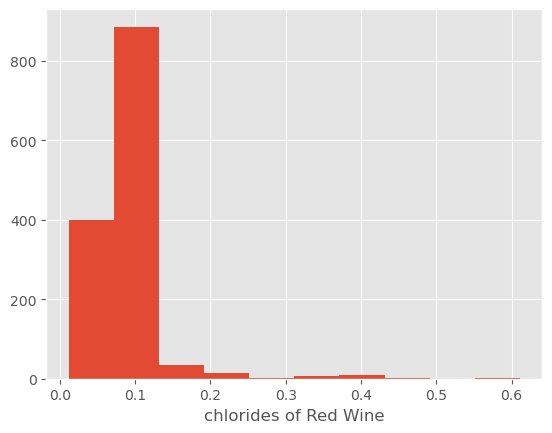

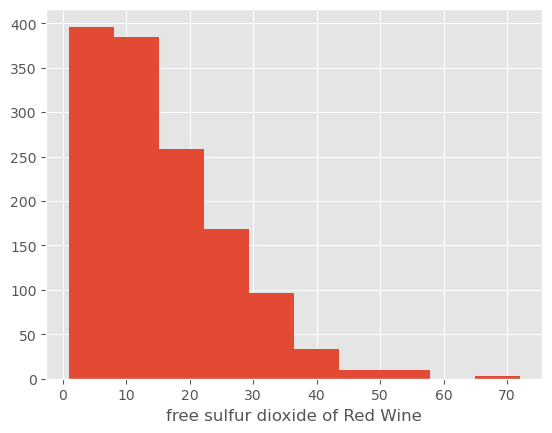

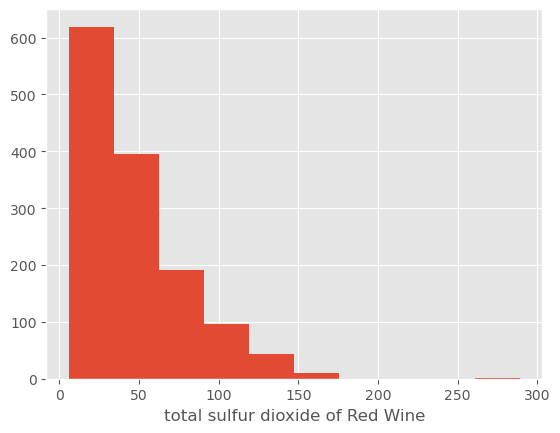

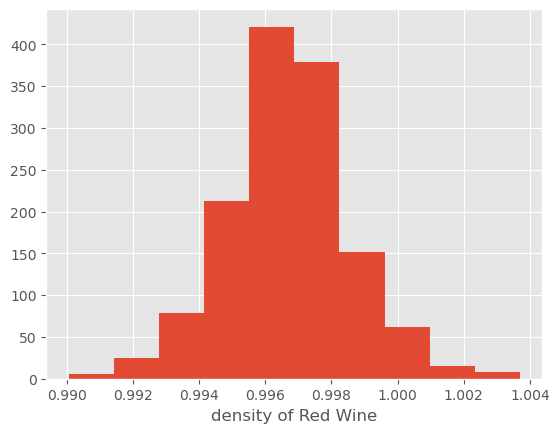

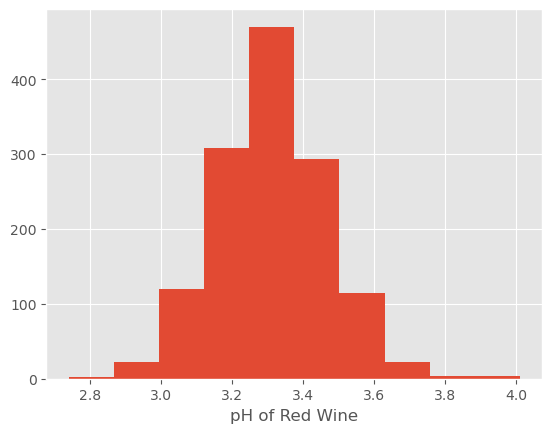

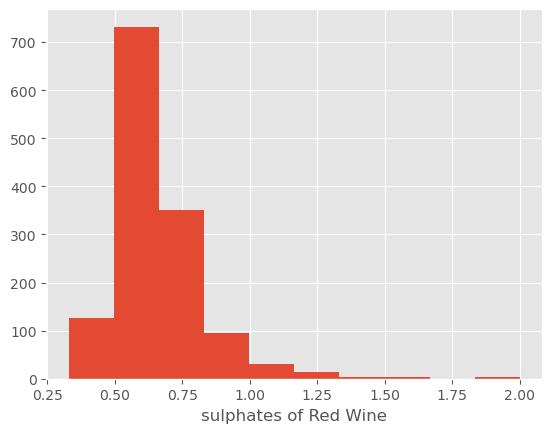

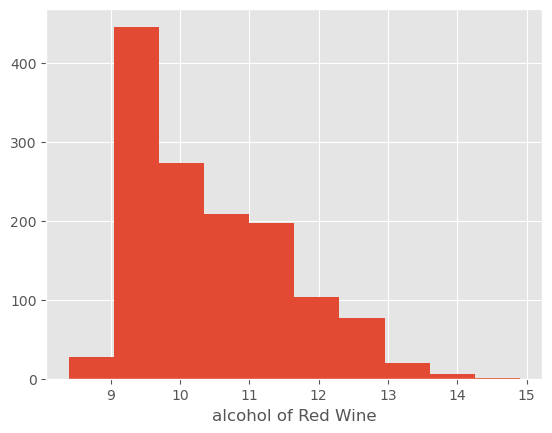

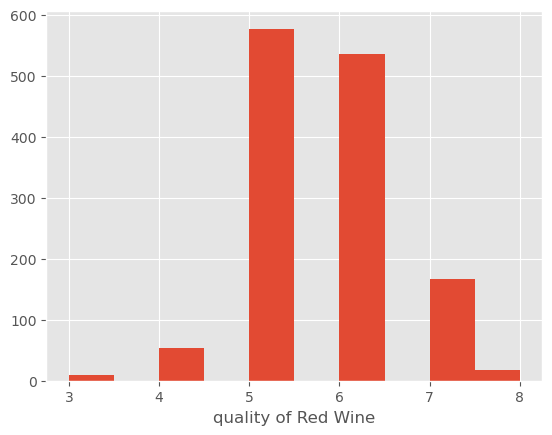

In [18]:
# Plotting histogram for each variable
for col in df_red.columns.values:
  plt.hist(df_red[col])
  plt.xlabel(col + ' of Red Wine')
  plt.show()

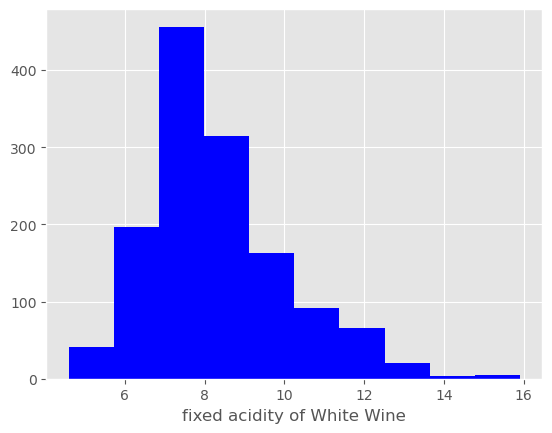

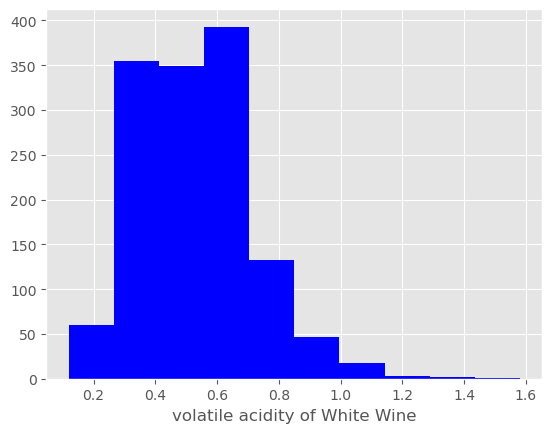

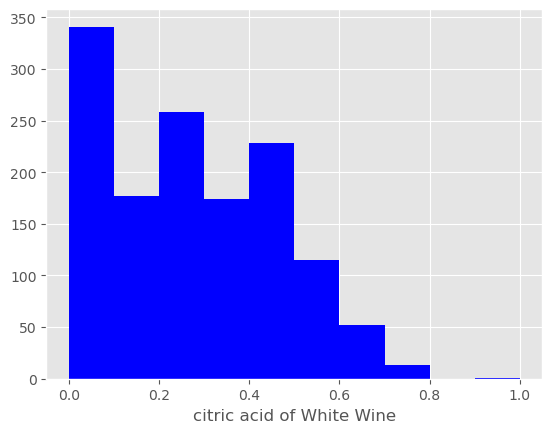

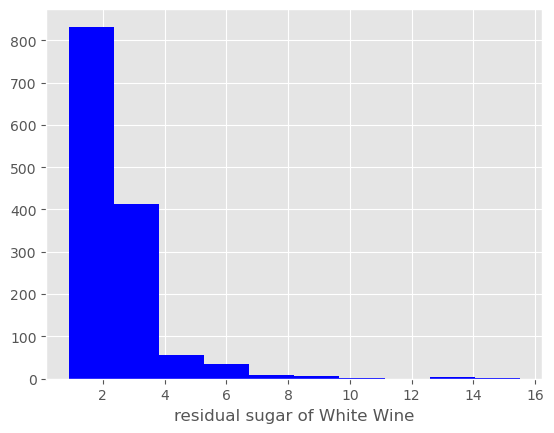

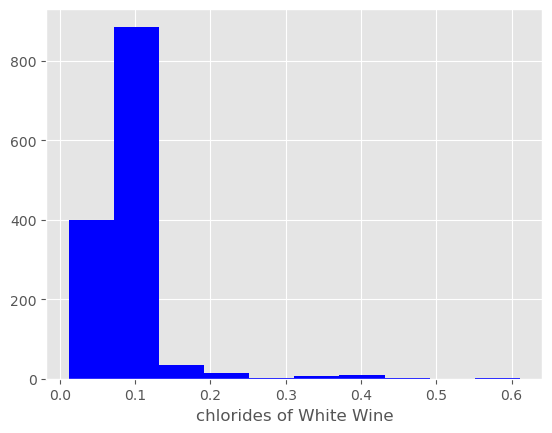

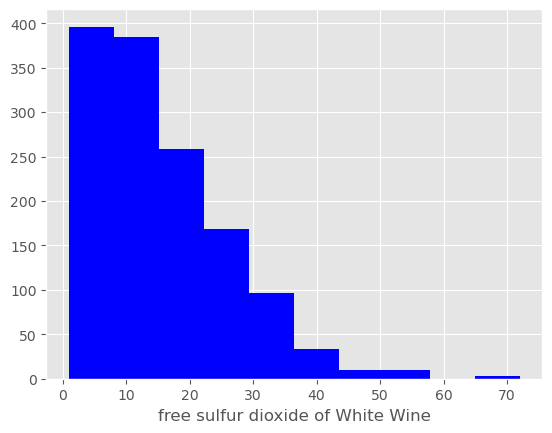

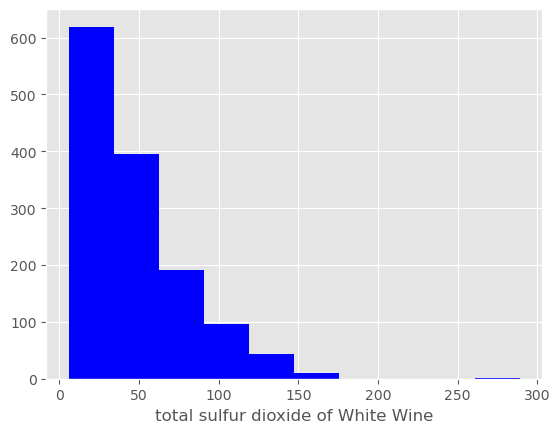

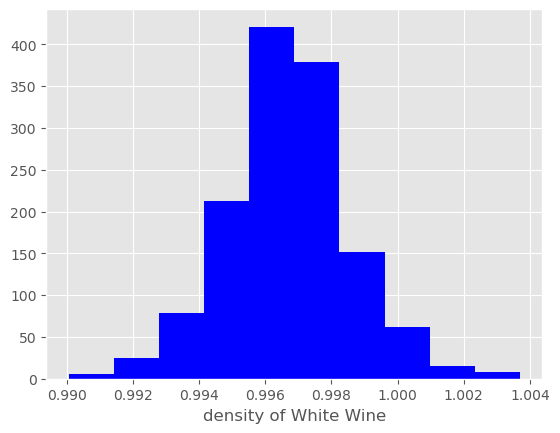

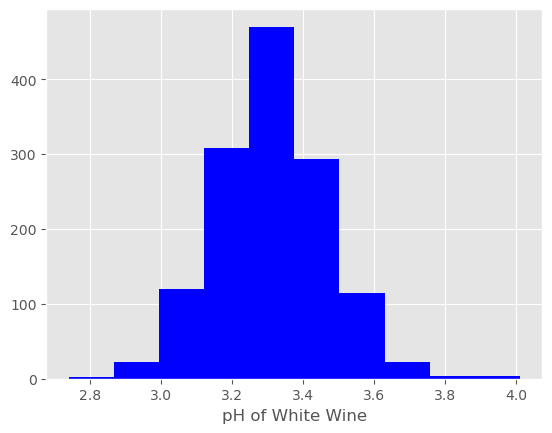

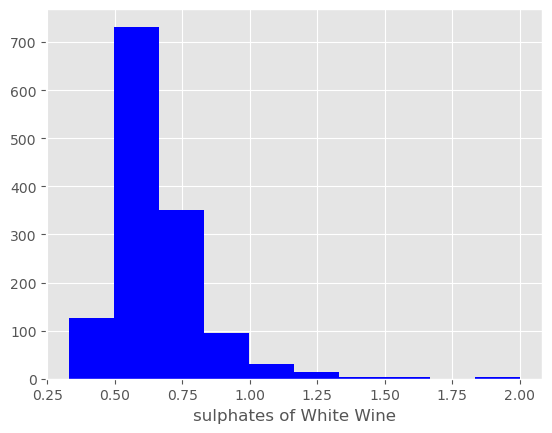

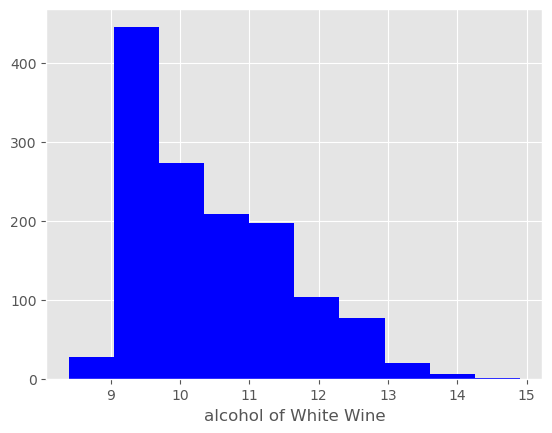

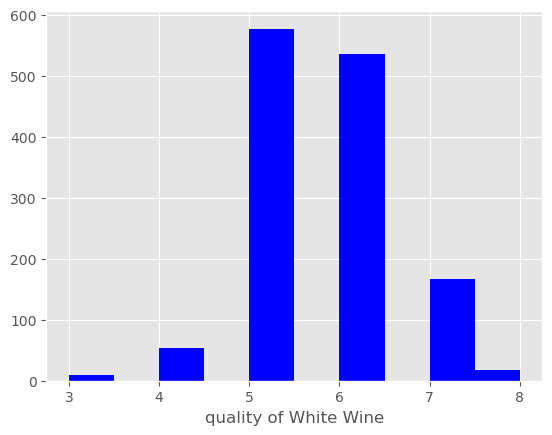

In [19]:
# Plotting histogram for each variable
for col in df_red.columns.values:
  plt.hist(df_red[col], color='b')
  plt.xlabel(col + ' of White Wine')
  plt.show()

All variables are spread well. Some variables are slight skewed but will ignore as the skewness is not very drastic.

Now, we will look at the correlation between different variables.

array([[<Axes: xlabel='fixed acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='citric acid', ylabel='fixed acidity'>,
        <Axes: xlabel='residual sugar', ylabel='fixed acidity'>,
        <Axes: xlabel='chlorides', ylabel='fixed acidity'>,
        <Axes: xlabel='free sulfur dioxide', ylabel='fixed acidity'>,
        <Axes: xlabel='total sulfur dioxide', ylabel='fixed acidity'>,
        <Axes: xlabel='density', ylabel='fixed acidity'>,
        <Axes: xlabel='pH', ylabel='fixed acidity'>,
        <Axes: xlabel='sulphates', ylabel='fixed acidity'>,
        <Axes: xlabel='alcohol', ylabel='fixed acidity'>,
        <Axes: xlabel='quality', ylabel='fixed acidity'>],
       [<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='citric acid', ylabel='volatile acidity'>,
        <Axes: xlabel='residual sugar', ylabel='vol

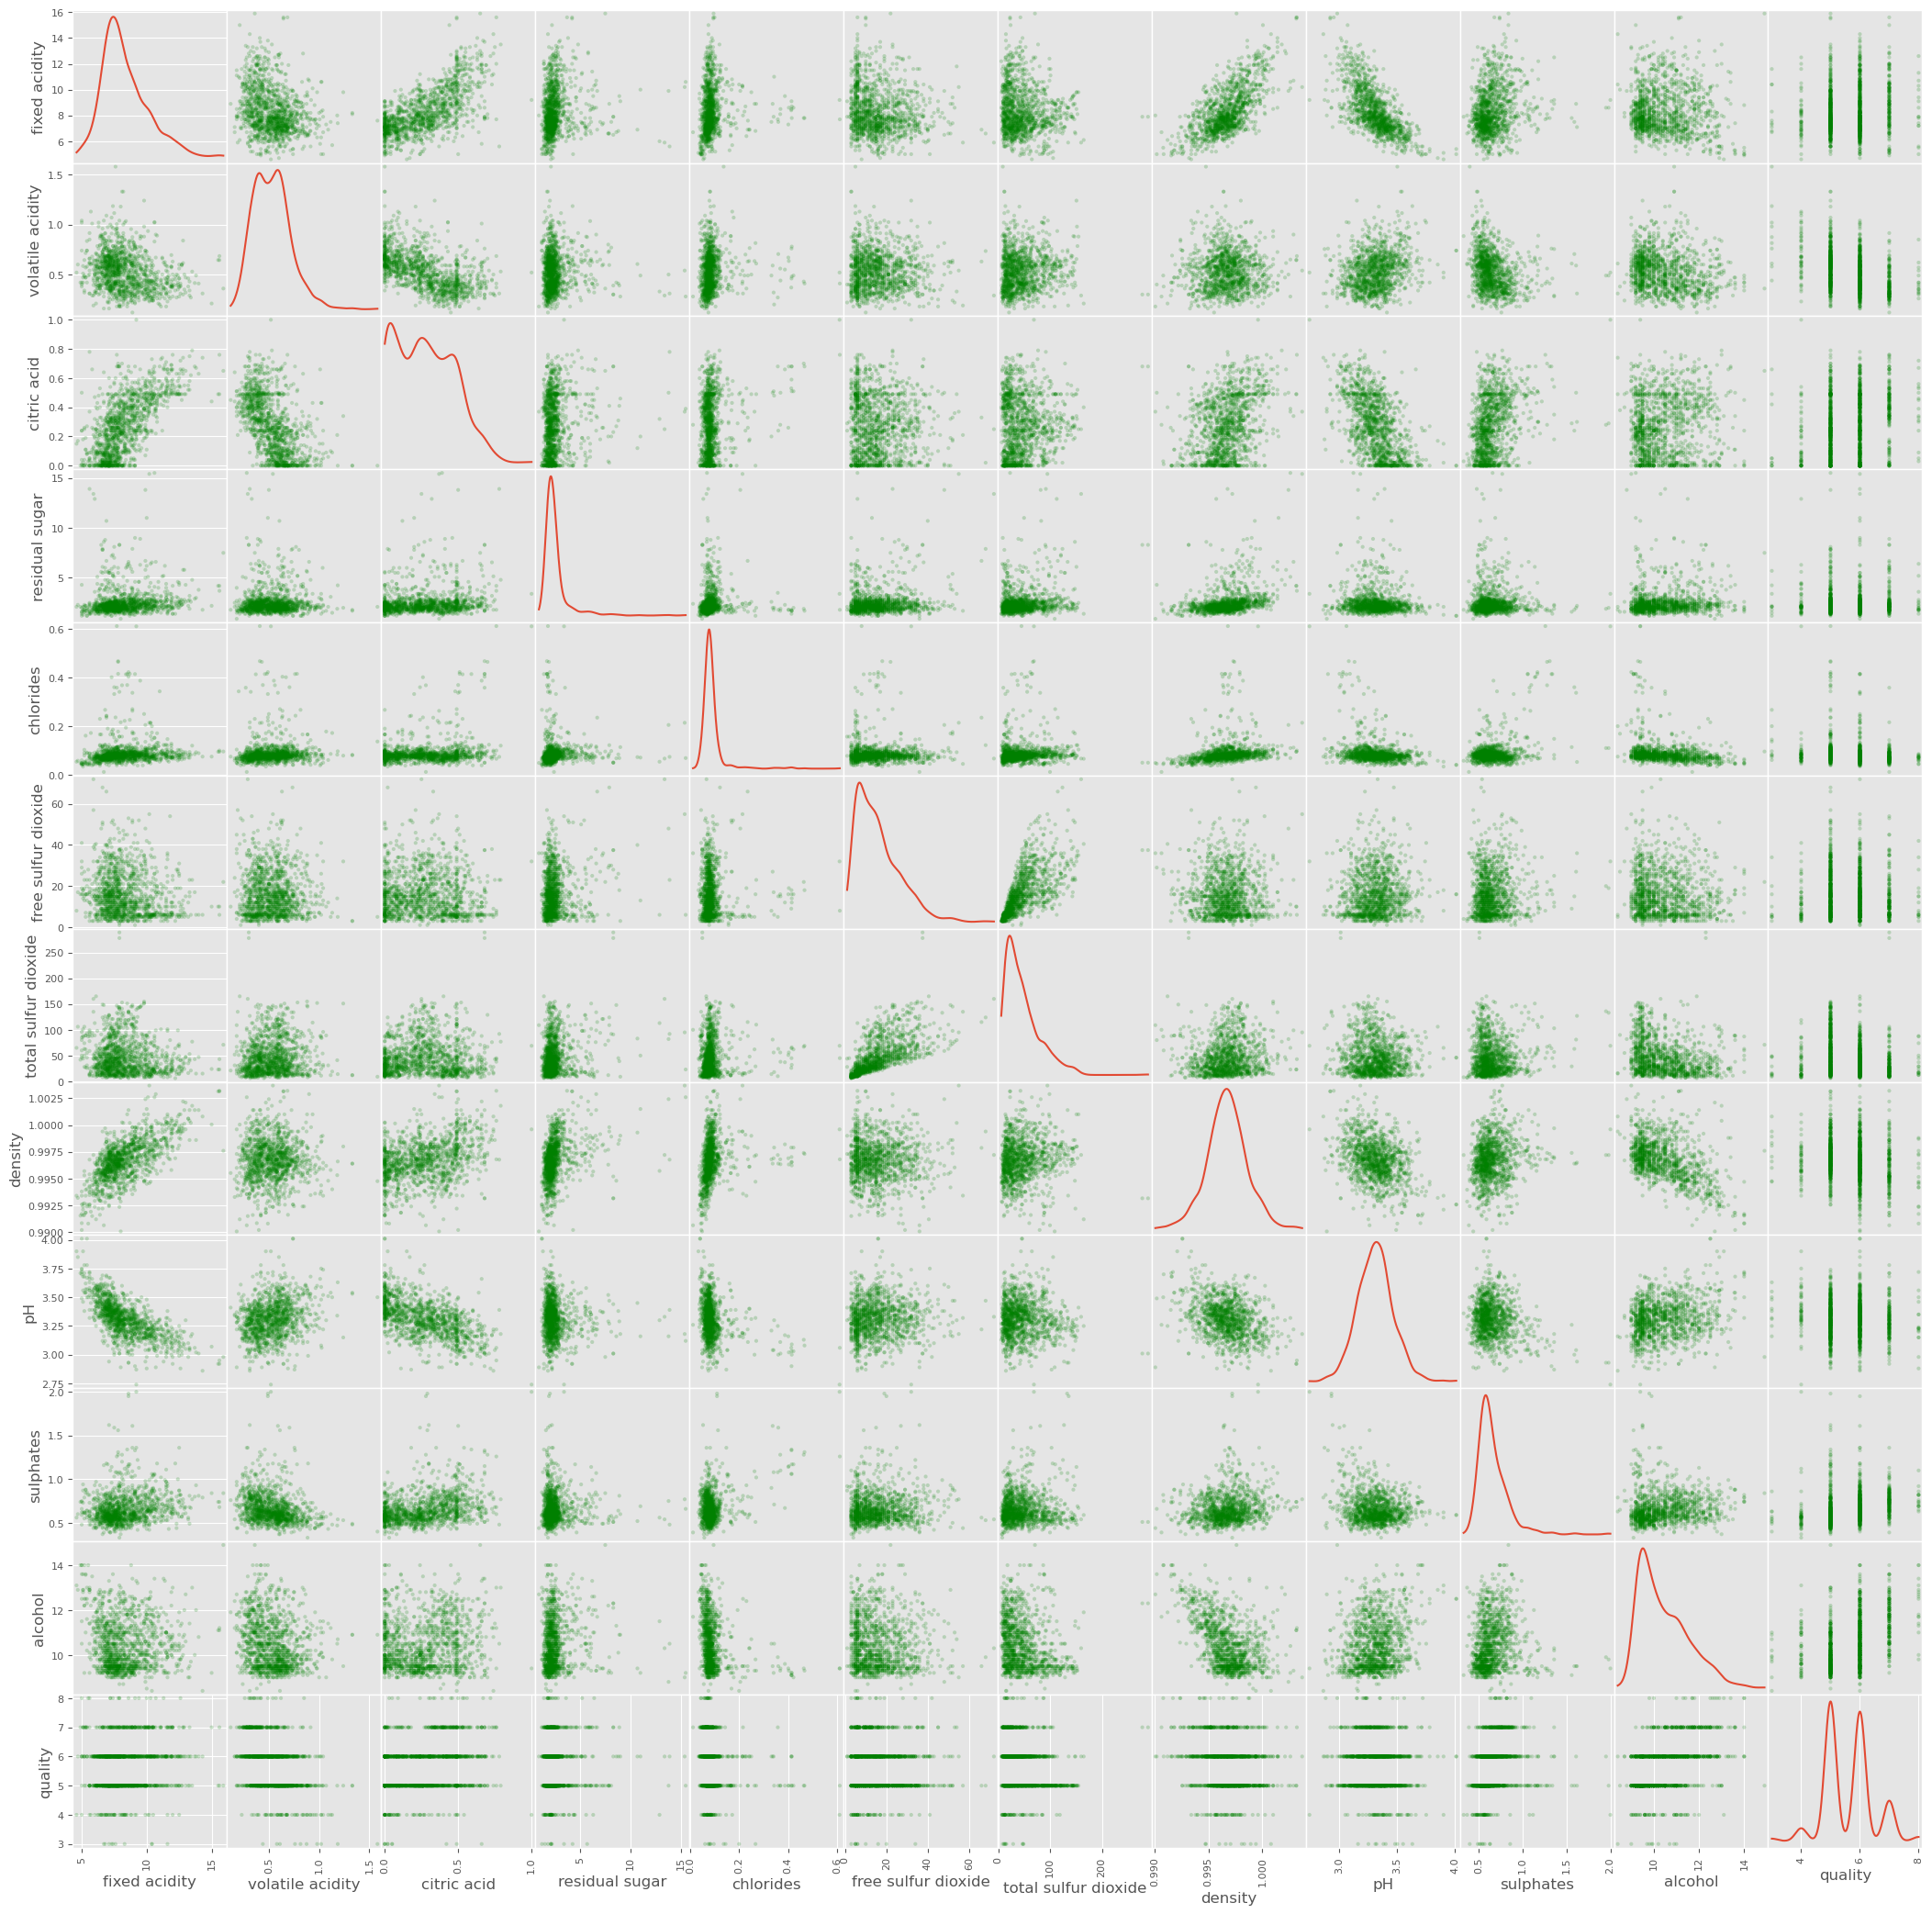

In [20]:
from pandas.plotting  import scatter_matrix
scatter_matrix(df_red, alpha=0.2, figsize=(26,26), diagonal='kde', color='g') 

array([[<Axes: xlabel='fixed acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='citric acid', ylabel='fixed acidity'>,
        <Axes: xlabel='residual sugar', ylabel='fixed acidity'>,
        <Axes: xlabel='chlorides', ylabel='fixed acidity'>,
        <Axes: xlabel='free sulfur dioxide', ylabel='fixed acidity'>,
        <Axes: xlabel='total sulfur dioxide', ylabel='fixed acidity'>,
        <Axes: xlabel='density', ylabel='fixed acidity'>,
        <Axes: xlabel='pH', ylabel='fixed acidity'>,
        <Axes: xlabel='sulphates', ylabel='fixed acidity'>,
        <Axes: xlabel='alcohol', ylabel='fixed acidity'>,
        <Axes: xlabel='quality', ylabel='fixed acidity'>],
       [<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='citric acid', ylabel='volatile acidity'>,
        <Axes: xlabel='residual sugar', ylabel='vol

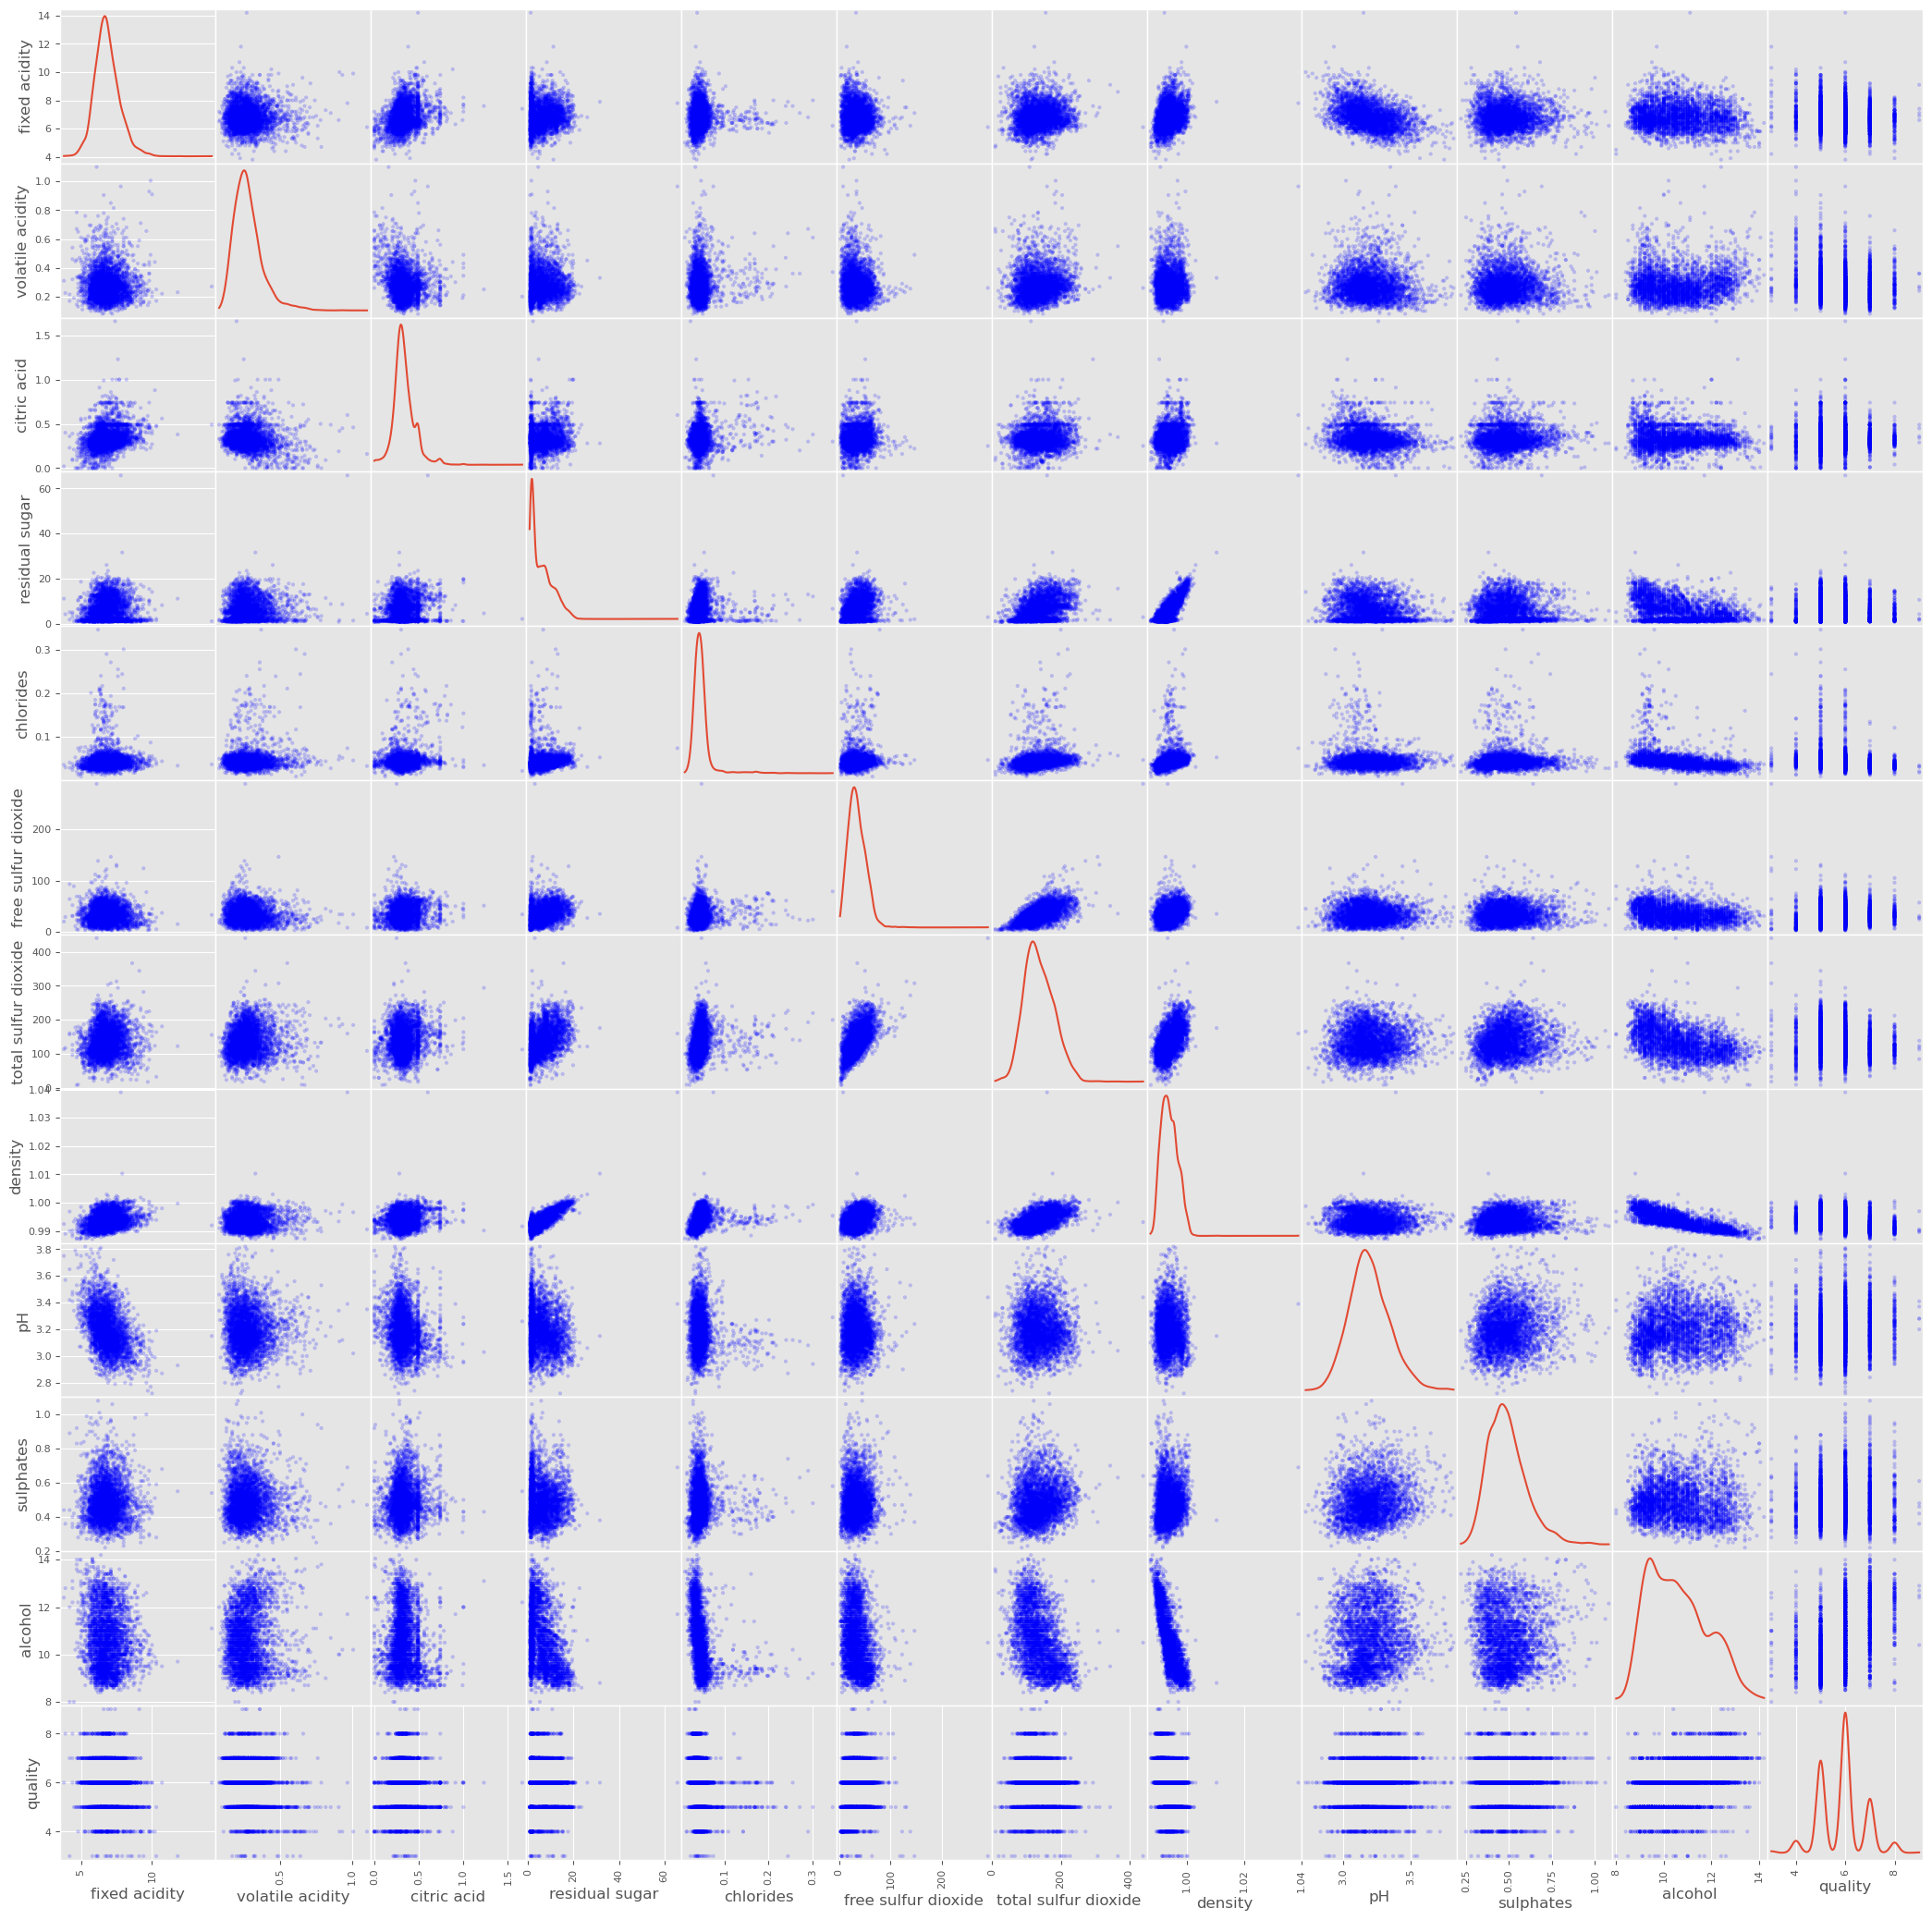

In [21]:
scatter_matrix(df_white, alpha=0.2, figsize=(26,26), diagonal='kde', color='b')

Their are many observations which can be made from the above scatter plots. However, the most important one is that quality is highly correlated with each varibale. Hence, when we proceed further to train our model, we cannot ignore any of the 11 dependent features. Almost all other variables have very low correlations

In plotting the scatter matrix, we visualized the correlation. Now, we will try to compute correlation numerically and present the computed correlation values visually.

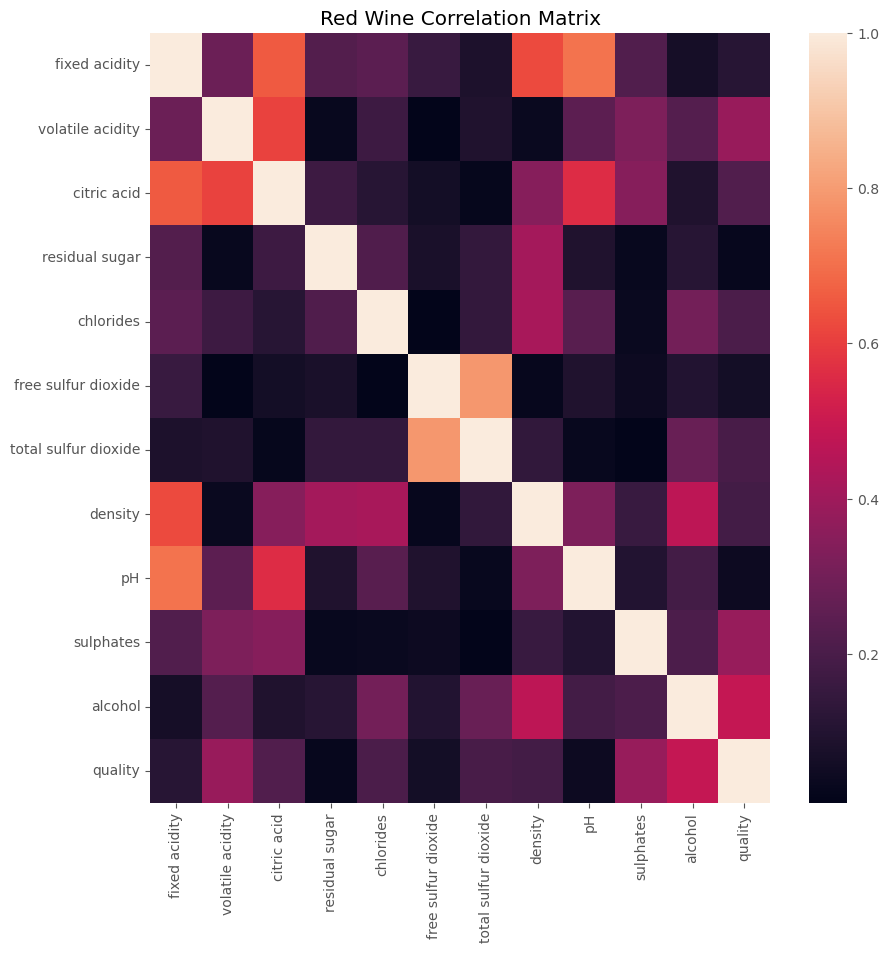

In [22]:
# For the Red Wine Data Set
corr_matrix_red = df_red.corr(method='spearman')  # Using spearmen for non-linear correlation
fig_red, ax_red = plt.subplots(figsize=(10,10))
sns.heatmap(abs(corr_matrix_red), annot=False)   # Showing absolute value (higher negative correlation implies larger correlation)
plt.title('Red Wine Correlation Matrix')
plt.show()

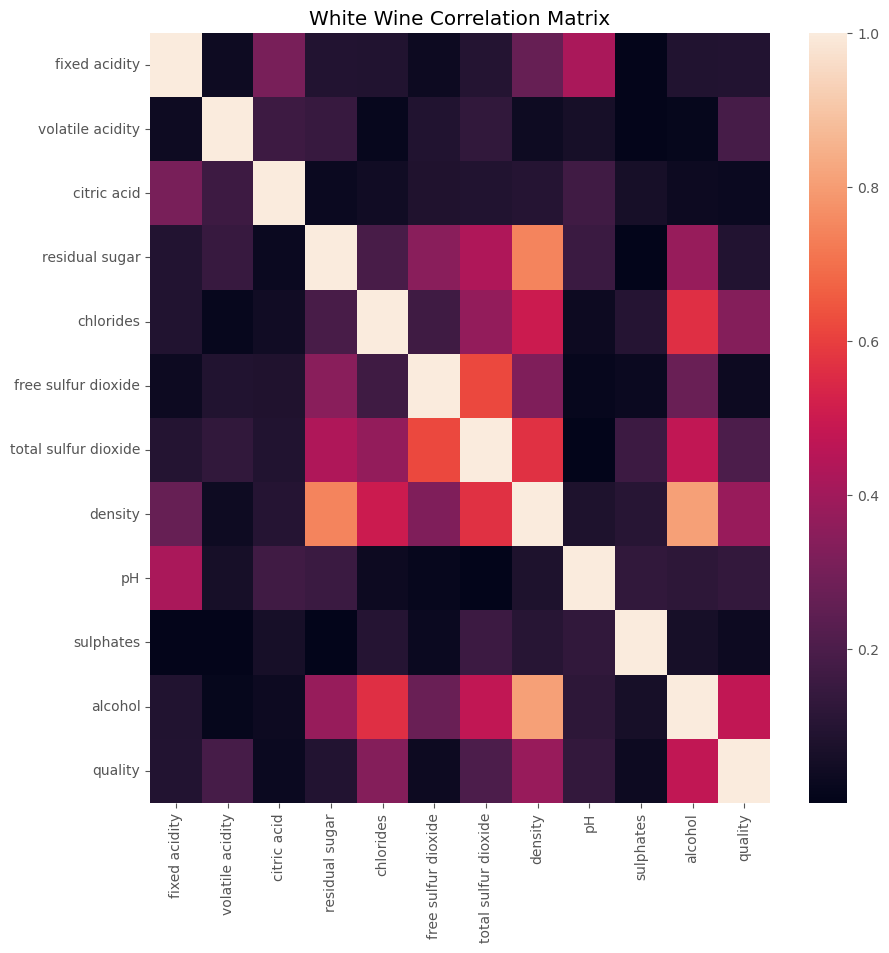

In [23]:
# For the White Wine Data Set
corr_matrix_white = df_white.corr(method='spearman')  # Using spearmen for non-linear correlation
fig_white , ax_white = plt.subplots(figsize=(10,10))
sns.heatmap(abs(corr_matrix_white), annot=False)   # Showing absolute value (higher negative correlation implies larger correlation)
plt.title('White Wine Correlation Matrix')
plt.show()

There are no off-diagonal white boxes. Hence, we'll not drop any variable

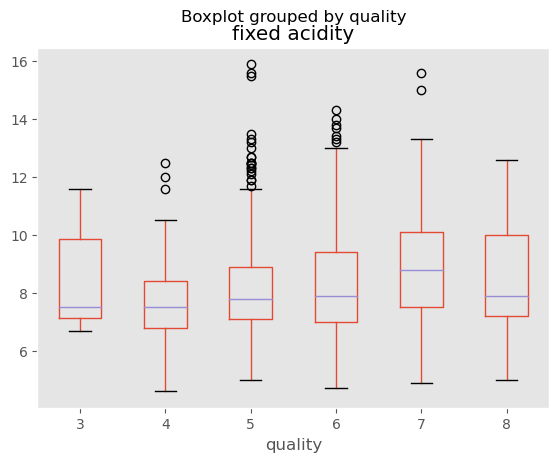

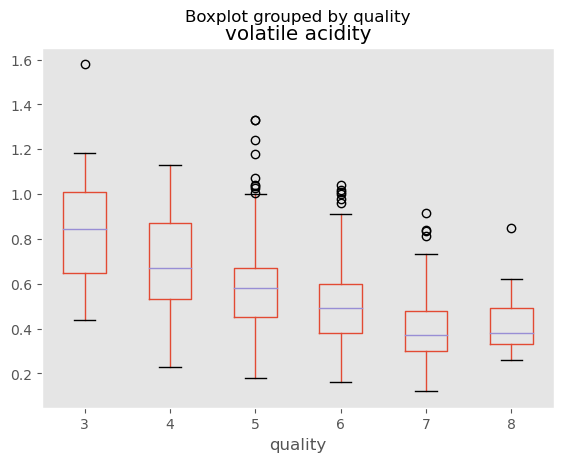

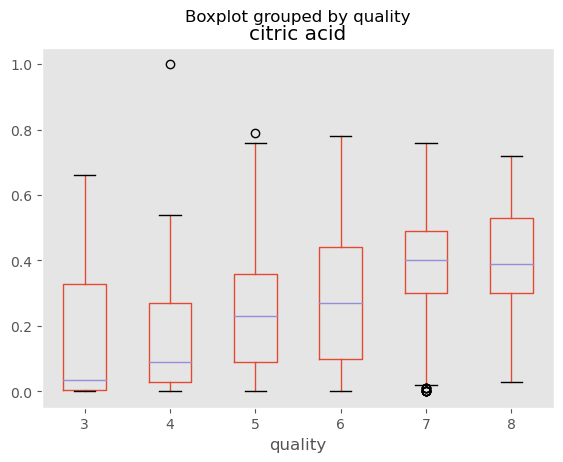

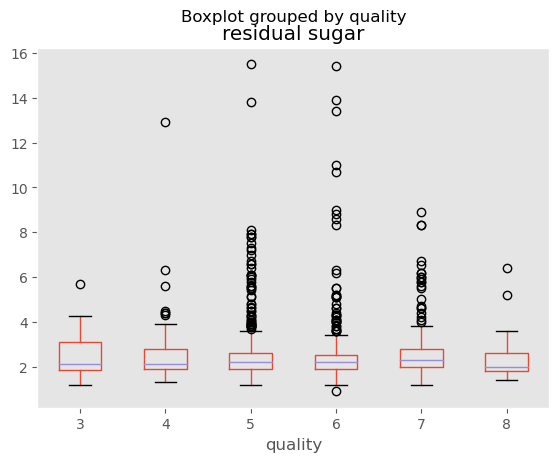

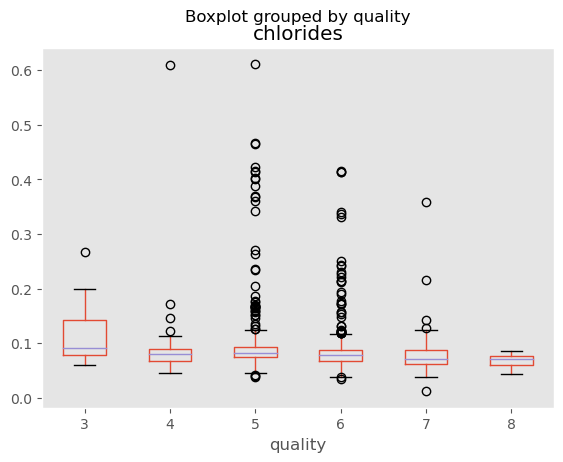

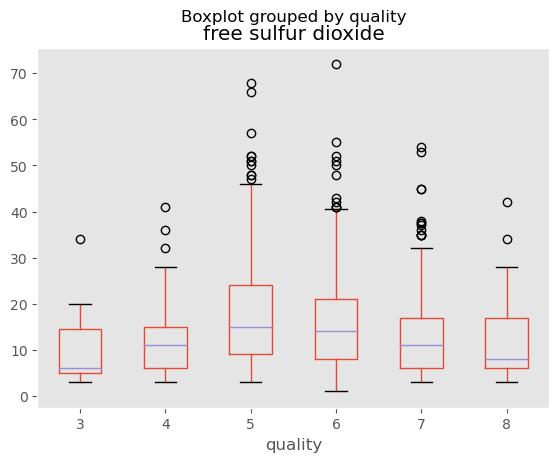

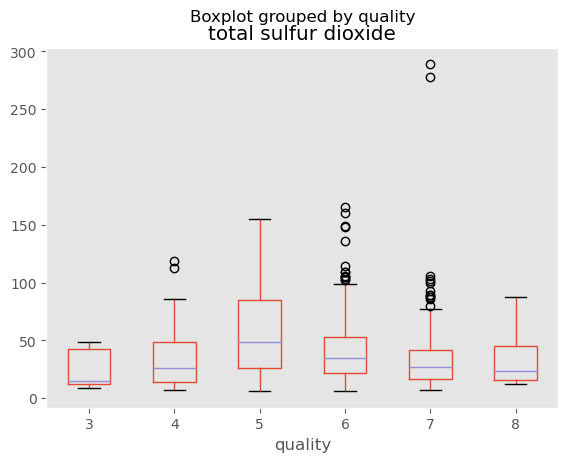

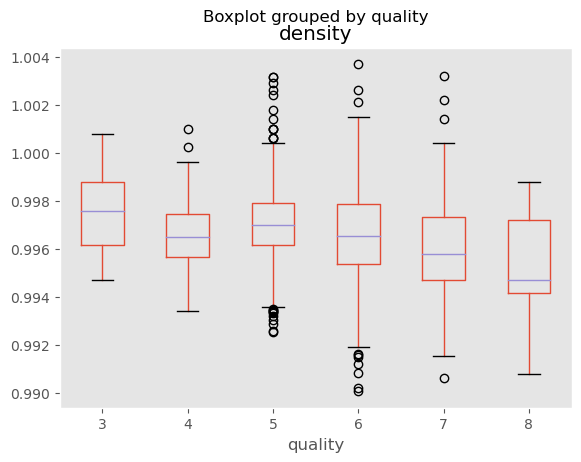

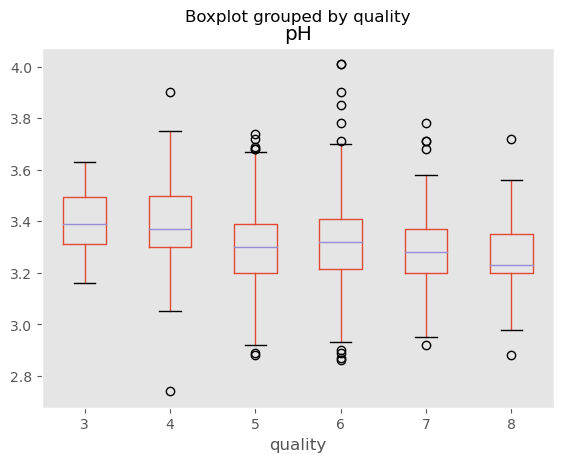

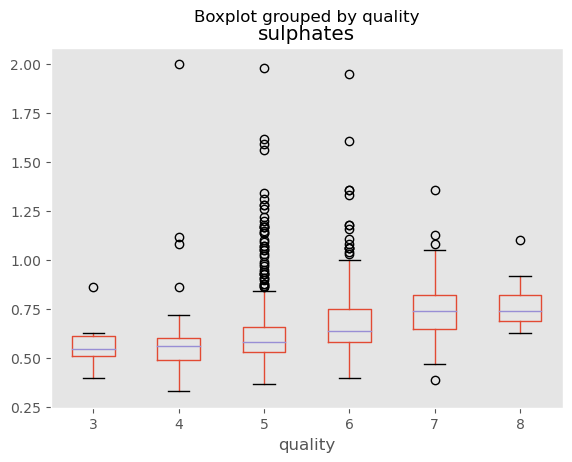

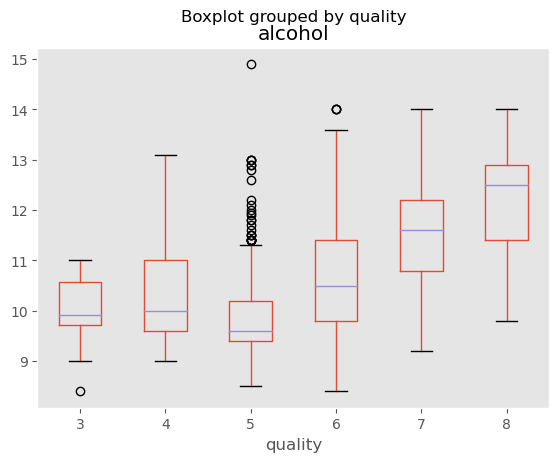

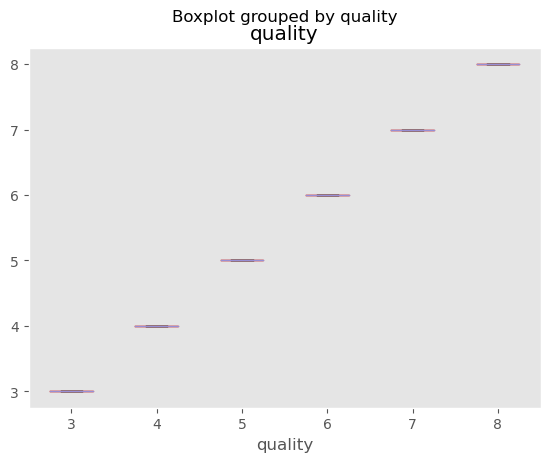

In [24]:
# # Plotting side-by-size boxplot for each variable to check identify the ones which are likely to help predict quality

for col in df_red.columns.values:
  df_red.boxplot(by='quality', column=col, grid=False)

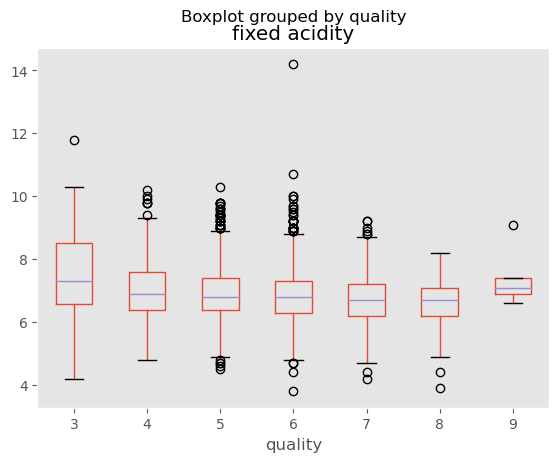

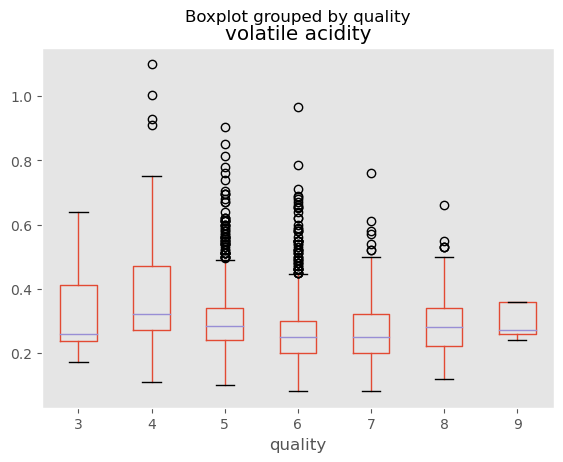

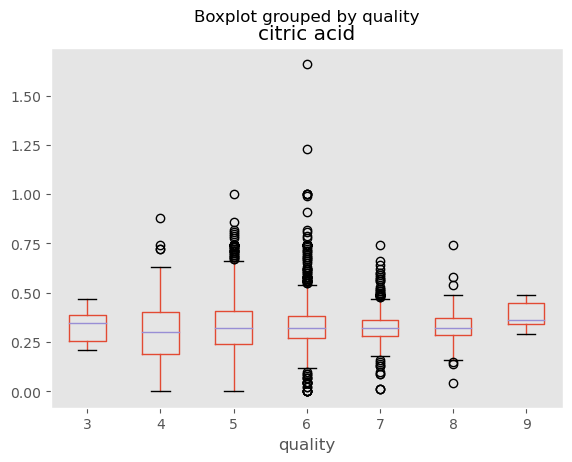

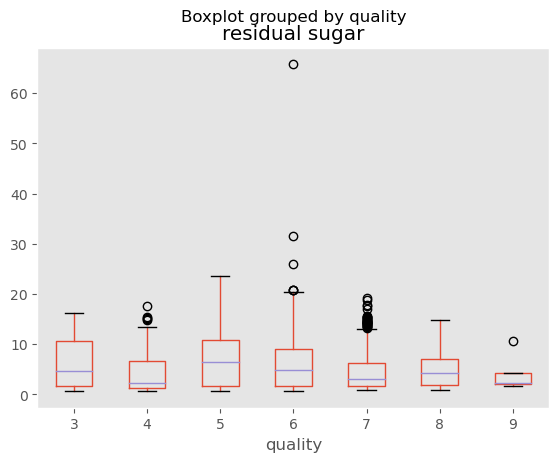

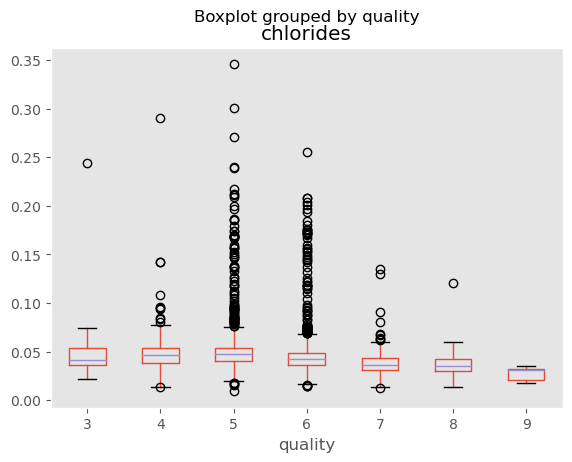

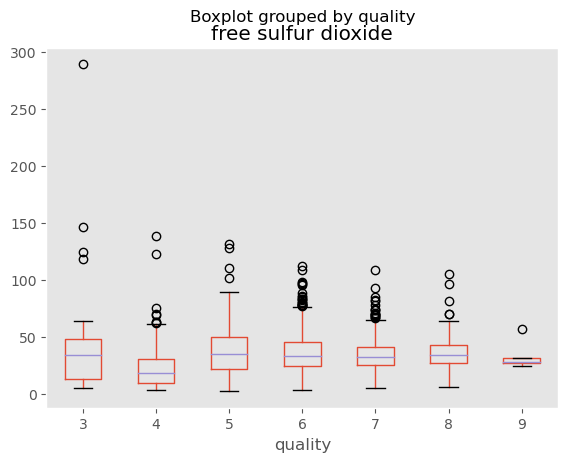

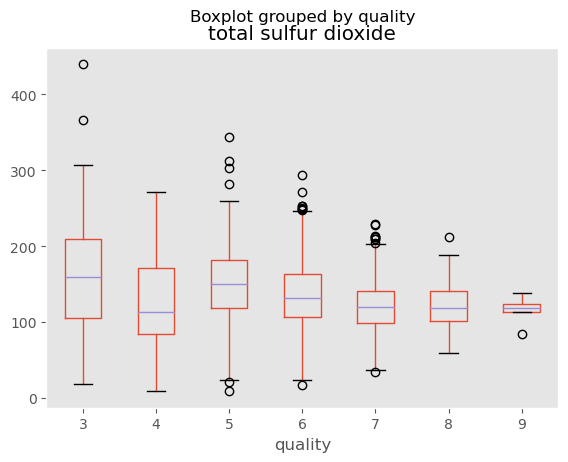

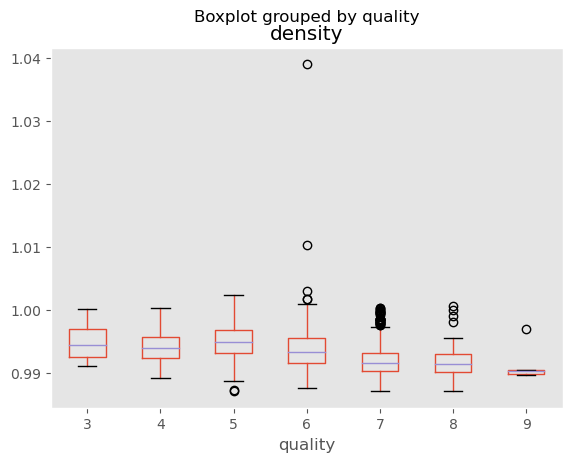

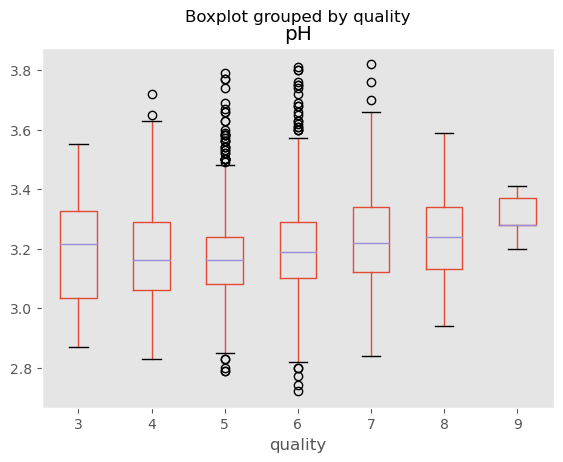

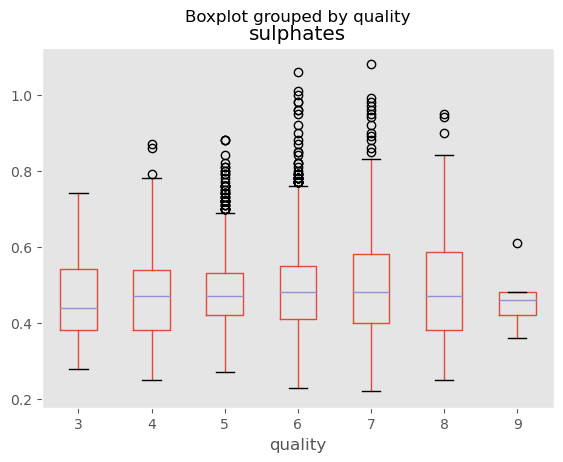

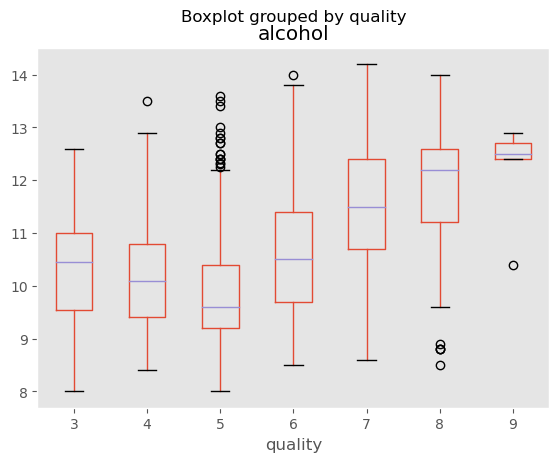

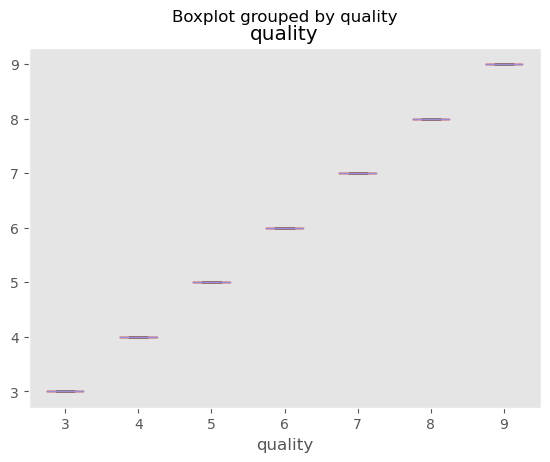

In [25]:
for col in df_white.columns.values:
  df_white.boxplot(by='quality', column=col, grid=False)

As we can see from the boxplots, variable do not symmetric side-by-side boxplots for each quality value. Hence, each variable will play a role in prediciting the value of quality. Hence, no varibale can be dropped.

### Pre-processing the data

In [26]:
# Splitting the data into train, validate and test subsets
# We'll split into 80% , 10% and 10% respectively

train_red, temp_test_red = train_test_split(df_red, test_size=0.2, random_state=42) 
test_red, valid_red = train_test_split(temp_test_red, test_size=0.5, random_state=42)

train_white, temp_test_white = train_test_split(df_white, test_size=0.2, random_state=42) 
test_white , valid_white = train_test_split(temp_test_white, test_size=0.5, random_state=42)

Pre-processing data for Red Wine

In [27]:
# Normalise the data set and make it zero mean and unit variance

scaler = preprocessing.StandardScaler() # for data normalization
cols_red = df_red.columns.drop('quality').values  # columns to be used for training
scaler.fit(train_red[cols_red])
train_red_X = pd.DataFrame(scaler.transform(train_red[cols_red]))
train_red_Y = pd.DataFrame(train_red['quality'])

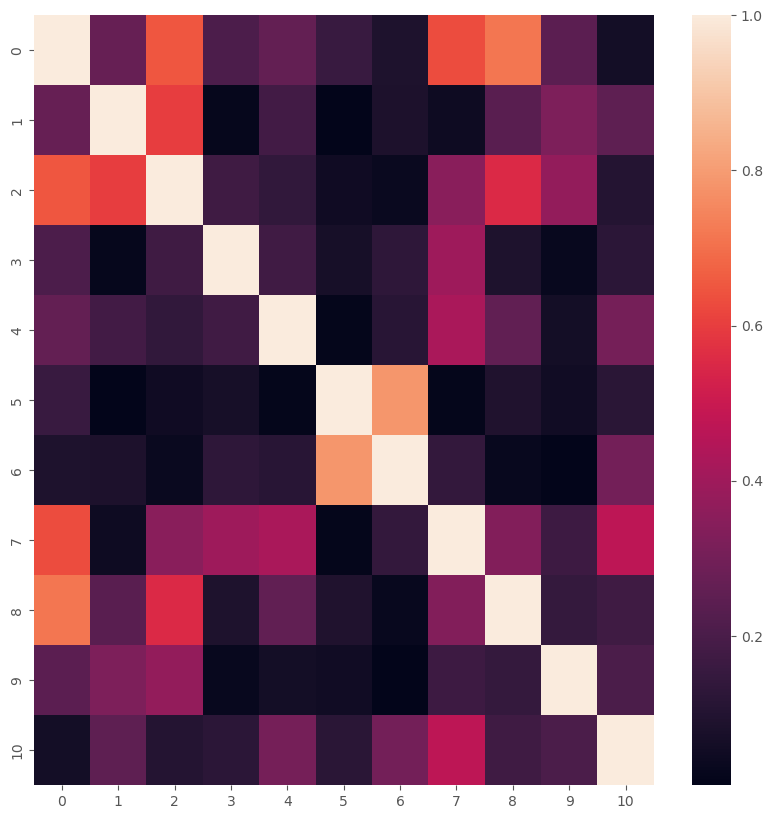

In [28]:
# Testing the correlations of the variables with each other
corr_matrix_red_train = train_red_X.corr(method='spearman')
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(abs(corr_matrix_red_train), annot=False)
plt.show()

As we can see, there are no 2 highly correlating varibles

In [29]:
# Preprocessing data for validation and test datasets

valid_red_X = pd.DataFrame(scaler.transform(valid_red[cols_red]))
valid_red_Y = pd.DataFrame(valid_red['quality'])

test_red_X = pd.DataFrame(scaler.transform(test_red[cols_red]))
test_red_Y = pd.DataFrame(test_red['quality'])

Pre-Processing data for White Wine

In [30]:
# Normalise the data set and make it zero mean and unit variance

scaler = preprocessing.StandardScaler() # for data normalization
cols_white = df_white.columns.drop('quality').values  # columns to be used for training
scaler.fit(train_white[cols_white])
train_white_X = pd.DataFrame(scaler.transform(train_white[cols_white]))
train_white_Y = pd.DataFrame(train_white['quality'])

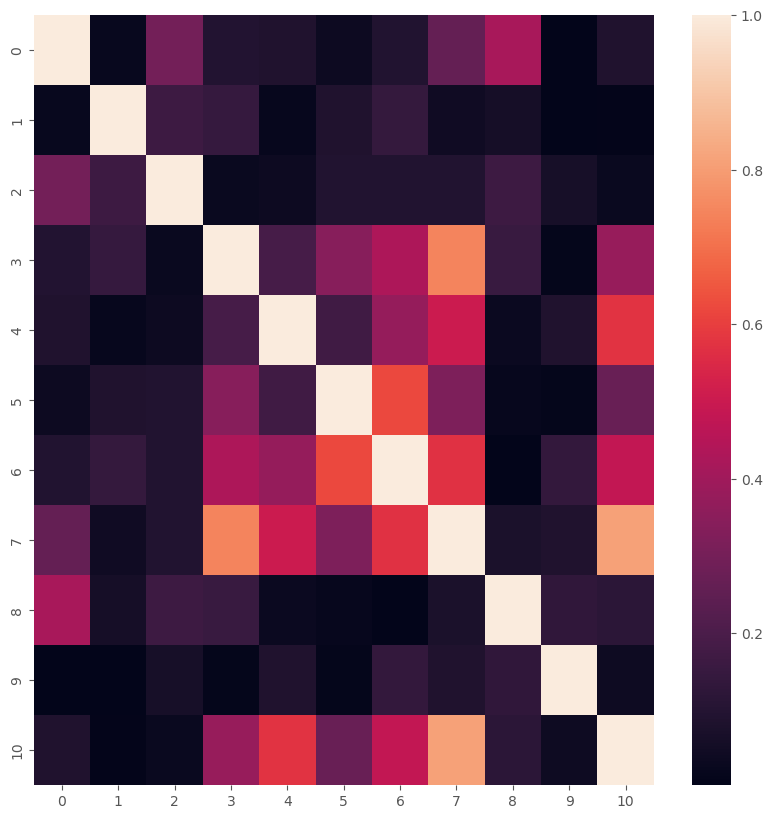

In [31]:
# Testing the correlations of the variables with each other
corr_matrix_white_train = train_white_X.corr(method='spearman')
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(abs(corr_matrix_white_train), annot=False)
plt.show()

Again, no correlations !!!

In [32]:
# Preprocessing data for validation and test datasets

valid_white_X = pd.DataFrame(scaler.transform(valid_white[cols_white]))
valid_white_Y = pd.DataFrame(valid_white['quality'])

test_white_X = pd.DataFrame(scaler.transform(test_white[cols_white]))
test_white_Y = pd.DataFrame(test_white['quality'])

### Training and Validation

#### Random Forest Classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

hyperparameters = {'n_estimators' : [10, 40, 100], 'max_depth' : [3, 6, 10]}

best_val_accuracy = 0 
best_hyperparameters = {}

train_red_Y_one = train_red_Y.values.ravel()

for n_estimators in hyperparameters['n_estimators']:
  for max_depth in hyperparameters['max_depth']:
    rf_classifier_red = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    rf_classifier_red.fit(train_red_X, np.array(train_red_Y_one))
    
    Y_val_pred = rf_classifier_red.predict(valid_red_X)
    val_accuracy = accuracy_score(Y_val_pred, valid_red_Y)
    
    if val_accuracy > best_val_accuracy:
      best_val_accuracy = val_accuracy
      best_hyperparameters = {'n_estimators' : n_estimators, 'max_depth' : max_depth}
print(best_val_accuracy)
print(best_hyperparameters)

0.6544117647058824
{'n_estimators': 40, 'max_depth': 6}


In [69]:
test_red_Y_one = test_red_Y.values.ravel()
y_hat = rf_classifier_red.predict(test_red_X)
print(accuracy_score(test_red_Y_one, y_hat))

0.6617647058823529


In [70]:
# Random forest for White Wine
hyperparameters = {'n_estimators' : [10, 40, 100], 'max_depth' : [3, 6, 10]}

best_val_accuracy = 0 
best_hyperparameters = {}

train_white_Y_one = train_white_Y.values.ravel()

for n_estimators in hyperparameters['n_estimators']:
  for max_depth in hyperparameters['max_depth']:
    rf_classifier_white = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    rf_classifier_white.fit(train_white_X, np.array(train_white_Y_one))
    
    Y_val_pred = rf_classifier_white.predict(valid_white_X)
    val_accuracy = accuracy_score(Y_val_pred, valid_white_Y)
    
    if val_accuracy > best_val_accuracy:
      best_val_accuracy = val_accuracy
      best_hyperparameters = {'n_estimators' : n_estimators, 'max_depth' : max_depth}
print(best_val_accuracy)
print(best_hyperparameters)

0.5642317380352645
{'n_estimators': 10, 'max_depth': 6}


In [71]:
test_white_Y_one = test_white_Y.values.ravel()
y_hat = rf_classifier_white.predict(test_white_X)
print(accuracy_score(y_hat, test_white_Y_one))

0.5126262626262627


As we can see, in both the cases, the accuracy of the model on the test data is similar to that on the validation data set. Hence, the model is acceptable.

#### Support Vector Regression with RBF kernel

In [79]:
from sklearn.svm import SVR 
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

hyperparameters = {'C' : [0.1, 10, 100], 'epsilon' : [0.0001, 0.1, 1]}
min_error = sys.float_info.max
best_hyperparameters = {}

train_red_Y_one = train_red_Y.values.ravel()

for C in hyperparameters['C']:
  for epsilon in hyperparameters['epsilon']:
    svm_rbf_red = SVR(kernel='rbf', C=C, epsilon=epsilon)
    svm_rbf_red.fit(train_red_X, train_red_Y_one) 
    Y_val_pred = svm_rbf_red.predict(valid_red_X)
    error = mean_squared_error(Y_val_pred, valid_red_Y)
    
    if error < min_error: 
      min_error = error
      best_hyperparameters = {'C' : C, 'epsilon' : epsilon}

print(min_error)
print(best_hyperparameters)

0.4469749975440025
{'C': 0.1, 'epsilon': 0.1}


In [80]:
# Testing the model on test data set
test_red_Y_one = test_red_Y.values.ravel()
y_hat = svm_rbf_red.predict(test_red_X)
print(mean_squared_error(y_hat, test_red_Y_one))

0.5013631964358881


In [81]:
from sklearn.svm import SVR 
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

hyperparameters = {'C' : [0.1, 10, 100], 'epsilon' : [0.0001, 0.1, 1]}
min_error = 0
best_hyperparameters = {}

train_white_Y_one = train_white_Y.values.ravel()

for C in hyperparameters['C']:
  for epsilon in hyperparameters['epsilon']:
    svm_rbf_white = SVR(kernel='rbf', C=C, epsilon=epsilon)
    svm_rbf_white.fit(train_white_X, train_white_Y_one) 
    Y_val_pred = svm_rbf_white.predict(valid_white_X)
    error = mean_squared_error(Y_val_pred, valid_white_Y)
    
    if error < min_error:
      min_error = error
      best_hyperparameters = {'C' : C, 'epsilon' : epsilon}

print(best_val_accuracy)
print(best_hyperparameters)

0.5642317380352645
{}


In [82]:
# Testing the model in test dataset
test_white_Y_one = test_white_Y.values.ravel()
y_hat = svm_rbf_white.predict(test_white_X)
print(mean_squared_error(y_hat, test_white_Y_one))

0.6796356193701677


In the case SVM too, the MSE is roughly same on when the model is applied on the validation and the test data set.

#### Importance of each variable in the ML model

#### Testing Models from White Wine on Red Wine and vice-versa

Testing Models from White Wine on Red Wine

In [85]:
y_hat_red = rf_classifier_white.predict(test_red_X)
print(f"Accuracy of White's model tested on red data using Random Forsest: {accuracy_score(y_hat_red, test_red_Y_one)}")

y_hat_red = svm_rbf_white.predict(test_red_X)
print(f"Mean Squared Error of White's model tested on red data using SVM: {mean_squared_error(y_hat_red, test_red_Y_one)}")

Accuracy of White's model tested on red data using Random Forsest: 0.5
Mean Squared Error of White's model tested on red data using SVM: 1.0457083158819993


As we can see, the performance of White's Model is better on Red Data when the model is Random Forest Classifier as compared to the SVM model.

Testing Models from Red Wine on White Wine

In [87]:
y_hat_white = rf_classifier_red.predict(test_white_X)
print(f"Accuracy of Red's model tested on white data using Random Forsest: {accuracy_score(y_hat_white, test_white_Y_one)}")

y_hat_white = svm_rbf_red.predict(test_white_X)
print(f"Mean Squared Error of Red's model tested on white data using SVM: {mean_squared_error(y_hat_white , test_white_Y_one)}")

Accuracy of Red's model tested on white data using Random Forsest: 0.4494949494949495
Mean Squared Error of Red's model tested on white data using SVM: 1.183570979024225


As we can see, the performance of Red's Model is better on White Data when the model is Random Forest Classifier as compared to the SVM model.

Note that the comparision is based on how worse the model has performed as compared to the model's perfomance on it's own data set.

Conclusion: Random Forest Classifier from White is applicable to Red and vice-versa. This is not the case for SVM

### Question 3

In [90]:
# Importing Necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')